In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("/kaggle/input/house-dataset/house_dataset.csv")
dataset.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Area (sq ft),Bedrooms,Bathrooms,Location,Price (PKR)
0,1364,5.0,3.0,Karachi,3.848692e+07
1,4551,5.0,2.0,Karachi,1.284120e+08
2,3030,4.0,1.0,Rawalpindi,8.352625e+07
3,2751,4.0,NaN,Karachi,7.762282e+07
4,3980,1.0,2.0,Peshawar,1.102181e+08


In [2]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area (sq ft)  1000 non-null   int64  
 1   Bedrooms      974 non-null    float64
 2   Bathrooms     982 non-null    float64
 3   Location      990 non-null    object 
 4   Price (PKR)   990 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 39.2+ KB


,Area (sq ft),Bedrooms,Bathrooms,Price (PKR)
count,1000.000000,9.740000e+02,9.820000e+02,9.900000e+02
mean,2730.298000,1.140735e+05,5.787529e+03,1.010390e+17
std,1295.814473,3.219981e+06,1.601068e+05,3.178208e+18
min,502.000000,1.000000e+00,1.000000e+00,1.398891e+07
25%,1619.000000,2.000000e+00,1.000000e+00,4.499357e+07
50%,2668.000000,3.000000e+00,2.000000e+00,7.526762e+07
75%,3842.500000,4.000000e+00,3.000000e+00,1.088843e+08
max,4981.000000,1.000000e+08,5.000000e+06,1.000000e+20


In [3]:
(dataset.isnull().sum()/(dataset.shape[0]*dataset.shape[0]))*100

Area (sq ft)    0.0000
Bedrooms        0.0026
Bathrooms       0.0018
Location        0.0010
Price (PKR)     0.0010
dtype: float64

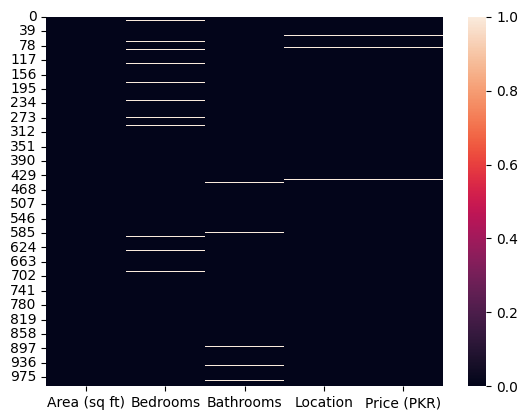

In [4]:
sns.heatmap(dataset.isnull())
plt.show()

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Identify numeric columns in the dataset
numeric_columns = dataset.select_dtypes(include=["number"]).columns

# Apply imputation to numeric columns
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

# Check for missing values after imputation
print("\nAfter Imputation:")
print(dataset.isnull().sum())



After Imputation:
Area (sq ft)     0
Bedrooms         0
Bathrooms        0
Location        10
Price (PKR)      0
dtype: int64


In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Identify numeric columns in the dataset
categoriacal_columns = dataset.select_dtypes(include=['object']).columns

# Apply imputation to numeric columns
dataset[categoriacal_columns] = imputer.fit_transform(dataset[categoriacal_columns])

# Check for missing values after imputation
print("\nAfter Imputation:")
print(dataset.isnull().sum())



After Imputation:
Area (sq ft)    0
Bedrooms        0
Bathrooms       0
Location        0
Price (PKR)     0
dtype: int64


In [7]:
dataset.head(4)

,Area (sq ft),Bedrooms,Bathrooms,Location,Price (PKR)
0,1364.0,5.0,3.000000,Karachi,3.848692e+07
1,4551.0,5.0,2.000000,Karachi,1.284120e+08
2,3030.0,4.0,1.000000,Rawalpindi,8.352625e+07
3,2751.0,4.0,5787.528513,Karachi,7.762282e+07


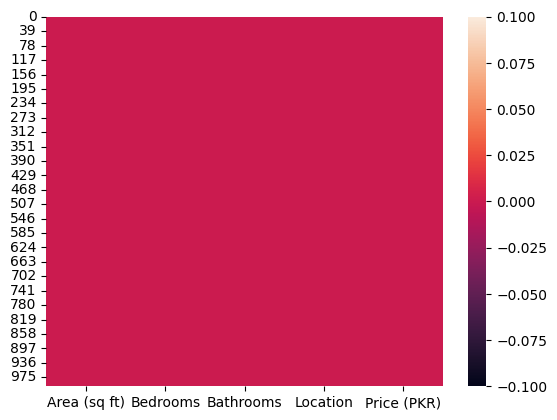

In [8]:
sns.heatmap(dataset.isnull())
plt.show()

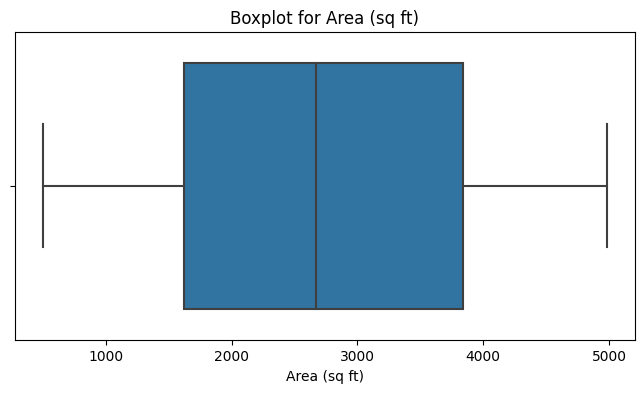

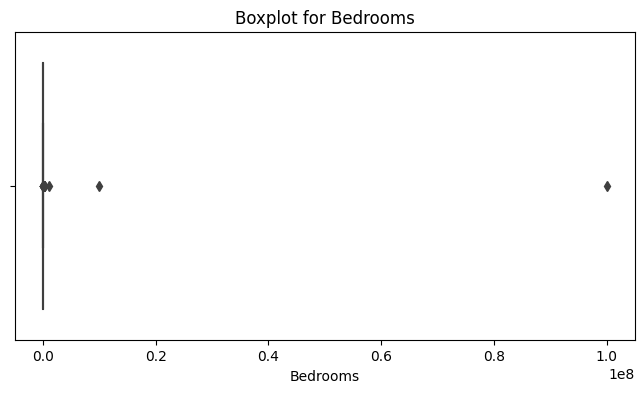

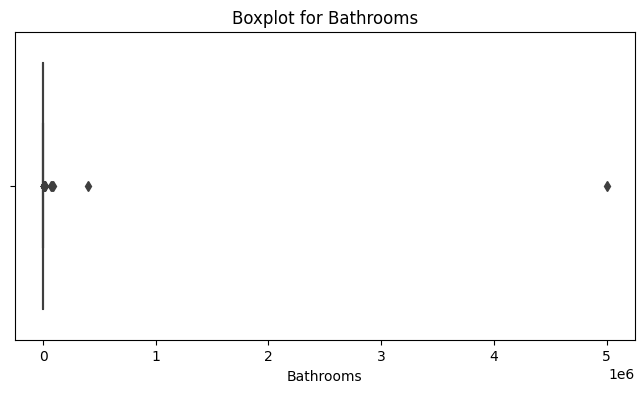

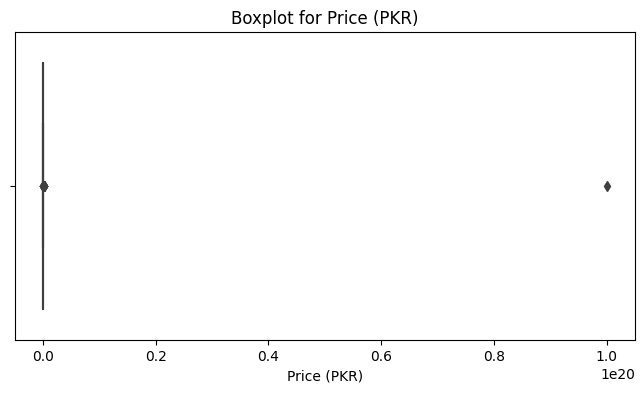

In [9]:
#outlier
# 
# Iterate over all numerical columns
for col in dataset.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col],data=dataset)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [10]:




# Iterate through each numerical column to remove outliers
for column in dataset.select_dtypes(include="number").columns:

    print(f"Processing column: {column}")
    
    # Calculate Q1, Q3, and IQR
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define outlier thresholds
    min_range = q1 - (1.5 * iqr)
    max_range = q3 + (1.5 * iqr)
    
    # print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
    # print(f"Outlier thresholds for {column}: [{min_range}, {max_range}]")
    
    # Remove outliers for this column
    dataset = dataset[(dataset[column] >= min_range) & (dataset[column] <= max_range)]

Processing column: Area (sq ft)
Processing column: Bedrooms
Processing column: Bathrooms
Processing column: Price (PKR)


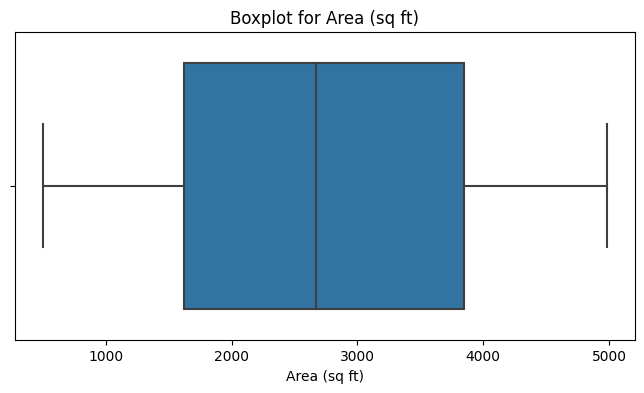

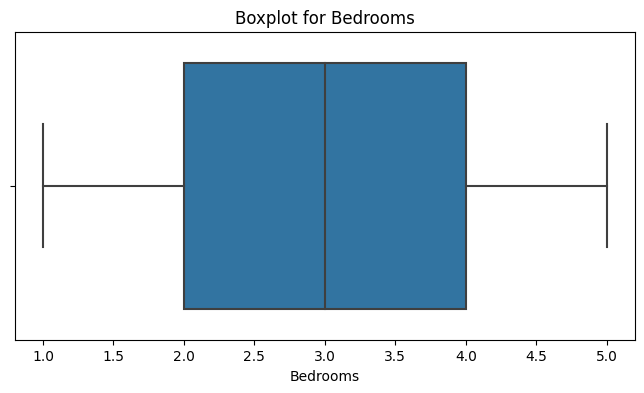

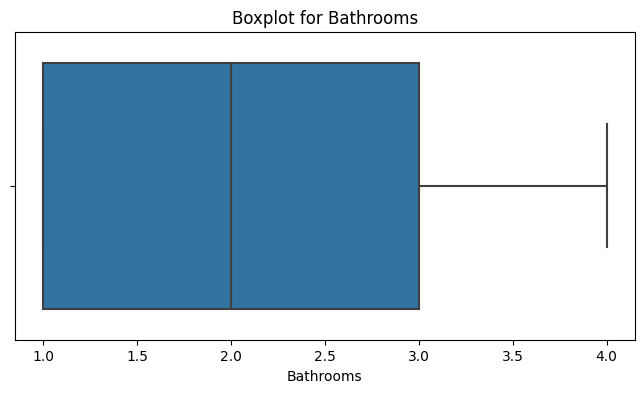

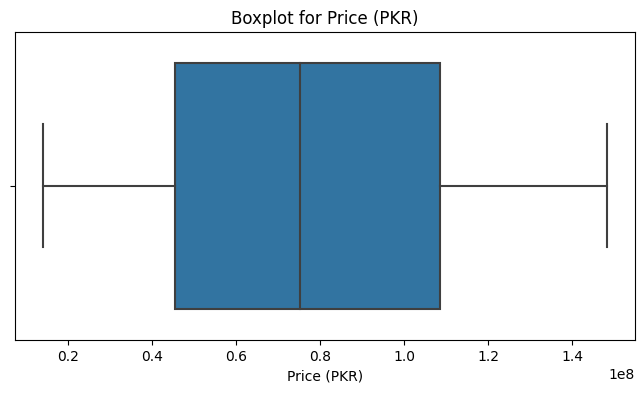

In [11]:
# Iterate over all numerical columns
for col in dataset.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col],data=dataset)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [12]:
dataset.head(5)

,Area (sq ft),Bedrooms,Bathrooms,Location,Price (PKR)
0,1364.0,5.0,3.0,Karachi,3.848692e+07
1,4551.0,5.0,2.0,Karachi,1.284120e+08
2,3030.0,4.0,1.0,Rawalpindi,8.352625e+07
4,3980.0,1.0,2.0,Peshawar,1.102181e+08
5,1704.0,3.0,2.0,Faisalabad,4.768262e+07


In [13]:
numerical_features = dataset.select_dtypes(include ="number")
numerical_features.head(5)

,Area (sq ft),Bedrooms,Bathrooms,Price (PKR)
0,1364.0,5.0,3.0,3.848692e+07
1,4551.0,5.0,2.0,1.284120e+08
2,3030.0,4.0,1.0,8.352625e+07
4,3980.0,1.0,2.0,1.102181e+08
5,1704.0,3.0,2.0,4.768262e+07


In [14]:
categorical_features = dataset.select_dtypes(include ="object")
categorical_features.head(5)

,Location
0,Karachi
1,Karachi
2,Rawalpindi
4,Peshawar
5,Faisalabad


In [15]:
from sklearn.preprocessing import LabelEncoder
for col in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    le.fit(dataset[col])
    dataset[col] = le.transform(dataset[col])
# print(hello)
    #print(dataset[col].unique())
    print(pd.DataFrame({'Original': le.classes_, 'Encoded': range(len(le.classes_))}))
    
#le.classes_ gives you the original values.
#range(len(le.classes_)) provides the corresponding encoded labels.


     Original  Encoded
0  Faisalabad        0
1   Islamabad        1
2     Karachi        2
3      Lahore        3
4      Multan        4
5    Peshawar        5
6      Quetta        6
7  Rawalpindi        7


In [16]:
dataset.head(3)

,Area (sq ft),Bedrooms,Bathrooms,Location,Price (PKR)
0,1364.0,5.0,3.0,2,3.848692e+07
1,4551.0,5.0,2.0,2,1.284120e+08
2,3030.0,4.0,1.0,7,8.352625e+07


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

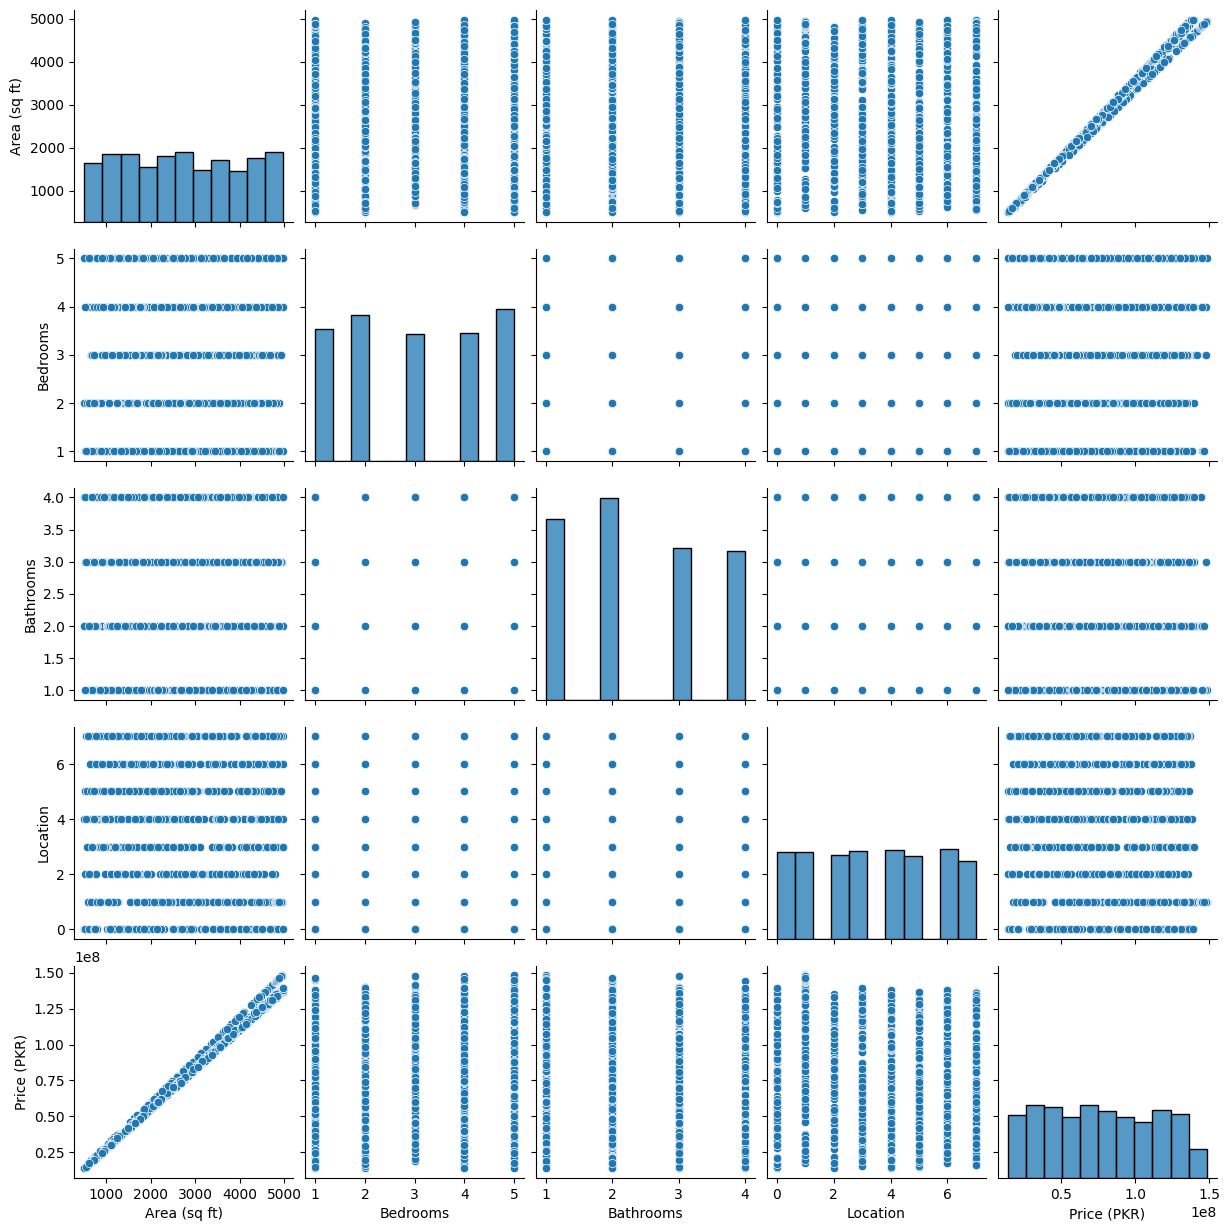

In [17]:
sns.pairplot(data=dataset)
plt.show()

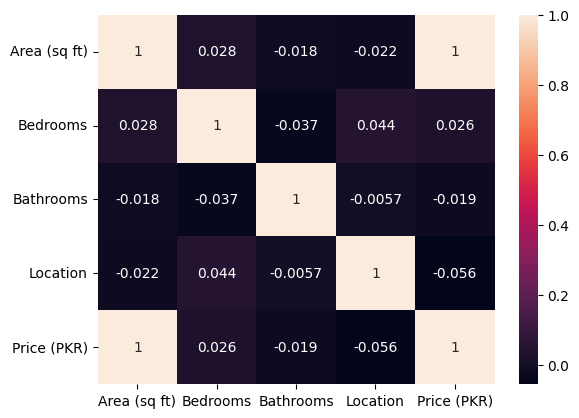

In [18]:
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns=["Price (PKR)"])
y = dataset["Price (PKR)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dt = DecisionTreeRegressor(
    max_depth=12,            # Increase depth slightly to capture more patterns
    min_samples_split=20,    # Balance splits
    min_samples_leaf=10,      # Ensure enough samples in leaf nodes
    max_leaf_nodes=75       # Allow more leaves for better splits
)
# dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12, max_leaf_nodes=75, min_samples_leaf=10,
                      min_samples_split=20)

In [21]:
dt.score(X_test,y_test)*100

99.6640520102687

In [22]:
dt.score(X_train,y_train)*100
# this means our model not over pridict 

99.72786275970127

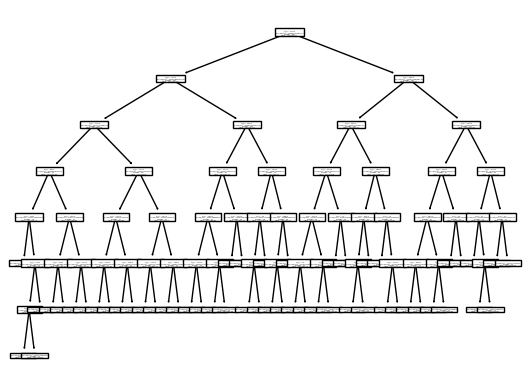

In [23]:
plot_tree(dt)
plt.show()

In [24]:
training_score = dt.score(X_train, y_train)
print("Training R² Score:", training_score)


Training R² Score: 0.9972786275970127


In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')
mean_cv_score = np.mean(cv_scores)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)


Cross-Validation Scores: [0.99563566 0.99394788 0.99594538 0.9950987  0.99493154]
Mean CV Score: 0.995111830165925


In [26]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape


((230, 4), (688, 4), (688,), (230,))

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)

train_mae = mean_absolute_error(y_train, pred_train)
test_mae = mean_absolute_error(y_test, pred_test)

train_r2 = r2_score(y_train, pred_train)
test_r2 = r2_score(y_test, pred_test)

# Display Metrics
print("Training MSE: ", train_mse)
print("Test MSE: ", test_mse)
print("Training MAE: ", train_mae)
print("Test MAE: ", test_mae)
print("Training R²: ", train_r2)
print("Test R²: ", test_r2)

# Interpretation
if train_r2 > test_r2 + 0.1:
    print("Model is overfitting.")
elif train_r2 < 0.5 and test_r2 < 0.5:
    print("Model is underfitting.")
else:
    print("Model is balanced.")


Training MSE:  3627189601910.716
Test MSE:  4795885709654.017
Training MAE:  1321301.2346227425
Test MAE:  1511583.8679930407
Training R²:  0.9972786275970127
Test R²:  0.996640520102687
Model is balanced.


In [34]:
import joblib

# Save the trained model to a file
joblib.dump(dt, "house_price_model.pkl")

['house_price_model.pkl']

In [35]:
predictions = dt.predict(X_test)
predictions

# # Comparing predictions with actual values

# comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
# comparison.head(10)

# # Ensure X_test is a DataFrame (in case it was converted to an array during processing)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df = X_test_df.copy()

X_test_df['Location'] = le.inverse_transform(X_test_df['Location'])
# Combine test data, actual values, and predictions into one DataFrame
combined = X_test_df.copy()
combined['Actual'] = y_test.values
combined['Predicted'] = predictions

# Display the combined DataFrame
combined.head(6)



,Area (sq ft),Bedrooms,Bathrooms,Location,Actual,Predicted
732,943.0,3.0,1.0,Multan,2.612186e+07,2.551603e+07
37,4704.0,3.0,4.0,Peshawar,1.302678e+08,1.309126e+08
420,4761.0,5.0,1.0,Multan,1.318835e+08,1.309126e+08
589,3889.0,3.0,1.0,Karachi,1.097329e+08,1.107035e+08
879,4755.0,2.0,1.0,Lahore,1.334222e+08,1.309126e+08
865,3708.0,1.0,4.0,Lahore,1.040440e+08,1.029295e+08
